# Aquaplanet with an improved Charnock relation
Chiel van Heerwaarden, 31 March 2016
## Introduction
In this experiment, we compare an ICON simulation in which $z_{0m}$ is computed following
$$z_{0m} = c_{char} \dfrac{u_*^2}{g} = c_{char} \dfrac{C_D \sqrt{u_1^2 + v_1^2}}{g},$$
where the in the last step $u_*^2$ is erroneously written as $C_D \sqrt{u_1^2 + v_1^2}$.

I have done an additional run with the following, and in my view correct, expression:
$$z_{0m} = c_{char} \dfrac{u_*^2}{g} = c_{char} C_D \dfrac{u_1^2 + v_1^2}{g},$$
thus omitting the square root.

Below, the resulting time and zonal averaged drag, 925 hPa wind and precipitation are shown for both simulations.
___

## Loading the data

In [1]:
import numpy as np
import datetime as dt
import netCDF4 as nc
import matplotlib.pyplot as pl
%matplotlib inline
pl.rcParams.update({'font.size': 12})
pl.rcParams.update({'figure.figsize': [10,5]})

In [2]:
tau_ref_file = nc.Dataset("tau_ref.nc"    , "r")
tau_new_file = nc.Dataset("tau_ref_new.nc", "r")
ua_ref_file  = nc.Dataset("ua_ref.nc"     , "r")
ua_new_file  = nc.Dataset("ua_ref_new.nc" , "r")
pr_ref_file  = nc.Dataset("pr_ref.nc"     , "r")
pr_new_file  = nc.Dataset("pr_ref_new.nc" , "r")
lat = ua_ref_file.variables["lat"][:]

In [3]:
tau_ref_mean = np.mean(np.mean( ( tau_ref_file.variables["tauu"][200:,:,:]**2 \
                                + tau_ref_file.variables["tauv"][200:,:,:]**2 )**.5, \
                               axis=0), axis=1)
tau_new_mean = np.mean(np.mean( ( tau_new_file.variables["tauu"][200:,:,:]**2 \
                                + tau_new_file.variables["tauv"][200:,:,:]**2 )**.5, \
                               axis=0), axis=1)
ua_ref_mean  = np.mean(np.mean(ua_ref_file .variables["ua"][200:,0,:,:], axis=0), axis=1)
ua_new_mean  = np.mean(np.mean(ua_new_file .variables["ua"][200:,0,:,:], axis=0), axis=1)
pr_ref_mean  = np.mean(np.mean(pr_ref_file .variables["pr"][200:,:,:]  , axis=0), axis=1)
pr_new_mean  = np.mean(np.mean(pr_new_file .variables["pr"][200:,:,:]  , axis=0), axis=1)

## Comparison and interpretation of simulations

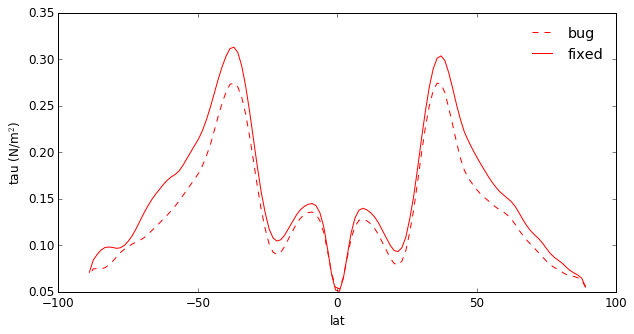

In [4]:
pl.plot(lat, tau_ref_mean, 'r--', label='bug'  )
pl.plot(lat, tau_new_mean, 'r-' , label='fixed')
pl.xlabel('lat')
pl.ylabel(r'tau (N/m$^2$)')
pl.legend(frameon=False);
pl.savefig('tau.pdf')

 The total drag is considerably higher for the case with the improved Charnock relation, thus more momentum is extracted from the atmosphere and transported into the ocean.
___

-9.13866 -8.21984 -0.100543
11.641 10.2256 -0.121591


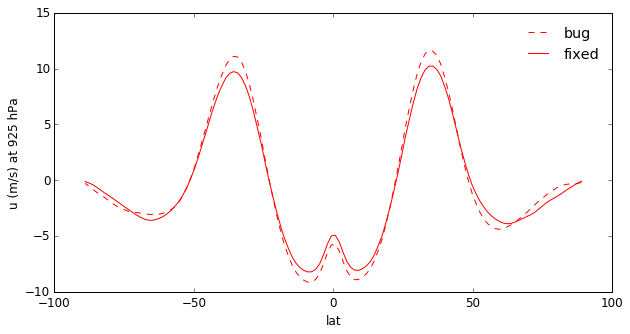

In [5]:
pl.plot(lat, ua_ref_mean, 'r--', label='bug'  )
pl.plot(lat, ua_new_mean, 'r-' , label='fixed')
pl.xlabel('lat')
pl.ylabel('u (m/s) at 925 hPa')
pl.legend(frameon=False);
pl.savefig('u.pdf')
print np.min(ua_ref_mean), np.min(ua_new_mean),\
      (np.min(ua_new_mean)-np.min(ua_ref_mean))/np.min(ua_ref_mean)
print np.max(ua_ref_mean), np.max(ua_new_mean),\
      (np.max(ua_new_mean)-np.max(ua_ref_mean))/np.max(ua_ref_mean)

An increased drag results in lower wind speeds from the equator until the poleward side of the midlatitude maximum. The maximum in the easterlies near the equator reduces with 10.1%, whereas the maximum in the westerlies in the midlatitude decreases with 12.2%.
___

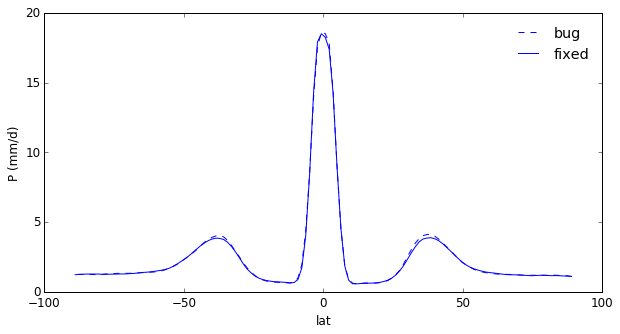

In [7]:
pl.plot(lat, 86400.*pr_ref_mean, 'b--', label='bug'  )
pl.plot(lat, 86400.*pr_new_mean, 'b-' , label='fixed')
pl.xlabel('lat')
pl.ylabel('P (mm/d)')
pl.legend(frameon=False);
pl.savefig('pr.pdf')

The influence of the bugfix on the magnitude and the location of the precipitation is negligibly small.
___